In [191]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Read data

In [193]:
ames = pd.read_csv("../data/engineered.csv")
ames.drop("Unnamed: 0", axis=1, inplace=True)

Select target and features for X to regress on

In [194]:
model = LinearRegression()

target = ames.LogSalePrice
X = ames[[
    # Size
    'GrLivArea', 'AllBathrooms', 'BedroomAbvGr',
    # Type
    'MSSubClass', 'MSZoning',
    # Niceness
    'OverallQual', 'OverallCond', 'Neighborhood', 'KitchenQual',
    # Sale
    'SaleCondition', 'YrSold',
    # Features
    'CentralAir', 'Fireplaces',
    # Others
    'IsNearNegativeCondition', 'LandContour'
]]
X

,GrLivArea,AllBathrooms,BedroomAbvGr,MSSubClass,MSZoning,OverallQual,OverallCond,Neighborhood,KitchenQual,SaleCondition,YrSold,CentralAir,Fireplaces,IsNearNegativeCondition,LandContour
0,856,2.0,2,Dwelling_30,RL,6,6,SWISU,3,Normal,Yr_2010,Y,1,0,Lvl
1,1049,3.0,2,Dwelling_120,RL,5,5,Edwards,4,Normal,Yr_2009,Y,0,0,Lvl
2,1001,1.0,2,Dwelling_30,C (all),5,9,IDOTRR,4,Normal,Yr_2007,Y,0,0,Lvl
3,1039,1.0,2,Dwelling_70,RL,4,8,OldTown,3,Normal,Yr_2009,Y,0,0,Lvl
4,1665,3.5,3,Dwelling_60,RL,8,6,NWAmes,4,Normal,Yr_2009,Y,0,0,Lvl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,952,1.0,2,Dwelling_30,RL,6,6,BrkSide,2,Normal,Yr_2009,N,1,0,Lvl
2573,1733,2.0,4,Dwelling_20,RL,3,5,Edwards,3,Normal,Yr_2009,Y,1,0,Lvl
2574,2002,2.0,4,Dwelling_90,RH,5,6,Crawfor,3,Normal,Yr_2007,N,0,0,HLS
2575,1842,3.5,3,Dwelling_60,RL,7,5,CollgCr,4,Normal,Yr_2007,Y,1,0,Lvl


Encode categorical features

In [195]:
# All possible features
all_categorical_features = set(features.get_categorical_features())
all_numerical_features = set(features.get_numerical_features())

# What are the categorical + numerical features in X
X_categorical_features = list(all_categorical_features.intersection(set(X.columns)))
X_numerical_features = list(all_numerical_features.intersection(set(X.columns)))
X_features = X_categorical_features + X_numerical_features

# Dummify categorical features from all features selected for our model
X = pd.get_dummies(X, columns=X_categorical_features, prefix=X_categorical_features, drop_first=True)
X

,GrLivArea,AllBathrooms,BedroomAbvGr,OverallQual,OverallCond,KitchenQual,Fireplaces,IsNearNegativeCondition,MSZoning_C (all),MSZoning_FV,...,MSSubClass_Dwelling_85,MSSubClass_Dwelling_90,LandContour_HLS,LandContour_Low,LandContour_Lvl,YrSold_Yr_2007,YrSold_Yr_2008,YrSold_Yr_2009,YrSold_Yr_2010,CentralAir_Y
0,856,2.0,2,6,6,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,1049,3.0,2,5,5,4,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1001,1.0,2,5,9,4,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,1039,1.0,2,4,8,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1665,3.5,3,8,6,4,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,952,1.0,2,6,6,2,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2573,1733,2.0,4,3,5,3,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2574,2002,2.0,4,5,6,3,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2575,1842,3.5,3,7,5,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1


Check for multicolinearity

In [196]:
# NOTE: The VIFs in the R car package also give VIF by the degrees of freedom of the feature which is useful for
# dummified features with lots of categories. So cross-check with linreg.R
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_add_const = add_constant(X) # apparently, this is required for statsmodels
vif = pd.DataFrame()
vif['features'] = X_add_const.columns
vif['VIF'] = [variance_inflation_factor(X_add_const.values, i) for i in range(X_add_const.shape[1])]
vif

,features,VIF
0,const,2913.322756
1,GrLivArea,4.330333
2,AllBathrooms,2.304164
3,BedroomAbvGr,2.218062
4,OverallQual,3.362502
...,...,...
65,YrSold_Yr_2007,1.723245
66,YrSold_Yr_2008,1.700677
67,YrSold_Yr_2009,1.738960
68,YrSold_Yr_2010,1.457430


In [197]:
# Create training set and holdout
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [198]:
# Fit model
model.fit(X=X_train, y=y_train)
y_predict = model.predict(X_test)

In [199]:
# Fit same model using statsmodels to see statistics
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     255.9
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:14:14   Log-Likelihood:                 1344.3
No. Observations:                1803   AIC:                            -2549.
Df Residuals:                    1733   BIC:                            -2164.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [212]:
# See more statsmodels statistics
def results_summary_to_dataframe(results):
    '''Take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                               })

    # Reorder
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

print(f"AIC {ans.aic}")
print(f"BIC {ans.bic}")
results_summary_to_dataframe(ans)

AIC -2548.57737741209
BIC -2163.7728717878576


,coeff,pvals,conf_lower,conf_higher
const,10.199127,0.000000e+00,9.950536,10.447718
GrLivArea,0.000310,1.067222e-125,0.000287,0.000334
AllBathrooms,0.065081,2.233486e-34,0.054867,0.075295
BedroomAbvGr,-0.025245,1.087326e-06,-0.035365,-0.015125
OverallQual,0.078074,5.279464e-85,0.070665,0.085483
...,...,...,...,...
YrSold_Yr_2007,-0.017802,4.018523e-02,-0.034806,-0.000798
YrSold_Yr_2008,-0.017457,4.941171e-02,-0.034868,-0.000045
YrSold_Yr_2009,-0.032092,2.977560e-04,-0.049458,-0.014727
YrSold_Yr_2010,-0.010296,3.092265e-01,-0.030148,0.009557


In [211]:
# Score model
print(f"Coefficient of Determination training set: {round(model.score(X=X_train, y=y_train), 5)}")
print(f"Coefficient of Determination holdout set:  {round(model.score(X=X_test, y=y_test), 5)}")
print(f"MSE:                                       {round(mean_squared_error(y_true=y_test, y_pred=y_predict), 5)}")

Coefficient of Determination training set: 0.91063
Coefficient of Determination holdout set:  0.88962
MSE:                                       0.01692


In [202]:
# Beta coefficients
beta_names = np.insert(model.feature_names_in_, 0, "__Intercept__")
log_coefficients = np.insert(model.coef_, 0, model.intercept_)
unlogged_coefficients = np.insert(np.exp(model.coef_), 0, np.exp(model.intercept_))
coeff_array = np.vstack([beta_names, log_coefficients, unlogged_coefficients]).T
pd.DataFrame(coeff_array, columns=['Features', 'Coefficients (log)', 'Coefficients'])

,Features,Coefficients (log),Coefficients
0,__Intercept__,10.199127,26879.702386
1,GrLivArea,0.00031,1.00031
2,AllBathrooms,0.065081,1.067245
3,BedroomAbvGr,-0.025245,0.975071
4,OverallQual,0.078074,1.081202
...,...,...,...
65,YrSold_Yr_2007,-0.017802,0.982356
66,YrSold_Yr_2008,-0.017457,0.982695
67,YrSold_Yr_2009,-0.032092,0.968417
68,YrSold_Yr_2010,-0.010296,0.989757


In [203]:
# Residuals
model_residuals_test = y_test - y_predict
model_residuals_test.describe()

count    774.000000
mean       0.005614
std        0.130031
min       -1.456695
25%       -0.058145
50%        0.003843
75%        0.076758
max        0.568590
Name: LogSalePrice, dtype: float64

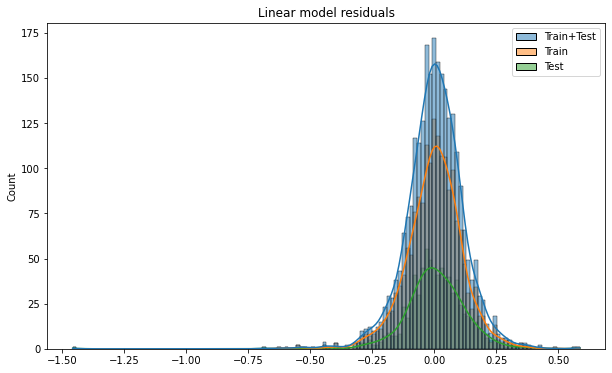

In [204]:
# Plot residuals
residuals_all = ames.LogSalePrice - model.predict(X)
residuals_train = y_train - model.predict(X_train)
residuals_test = y_test - model.predict(X_test)
residuals = pd.DataFrame({"Train+Test": residuals_all, "Train": residuals_train, "Test": residuals_test})

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(residuals, kde=True, ax=ax)
plt.title("Linear model residuals")
plt.show()

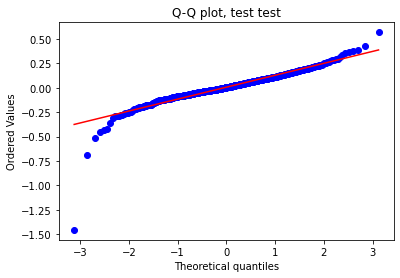

In [205]:
# Quantile-Quantile plot
from scipy import stats
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q plot, test test")
plt.show()

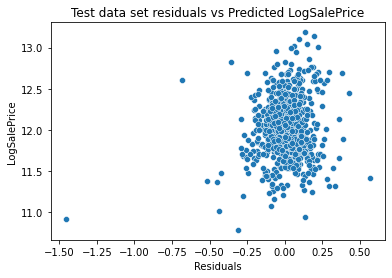

In [206]:
# Residuals vs Predicted LogSalePrice
sns.scatterplot(x=residuals_test, y=y_predict)
plt.title("Test data set residuals vs Predicted LogSalePrice")
plt.xlabel("Residuals")
plt.ylabel("LogSalePrice")
plt.show()